In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Load the CSV data
df = pd.read_csv("additionals/static_vehicle_data/processed_static_results/all_static_data.csv")

# Filter for 6-7 AM (3600-4500s)
df_peak = df[(df['interval_begin'] >= 900) & (df[' interval_end'] <= 4500)]

In [8]:
# Group by detector and time, average across seeds
df_grouped = df_peak.groupby([' interval_id', 'interval_begin'])[[' interval_meanTimeLoss', ' interval_meanOccupancy']].mean().reset_index()

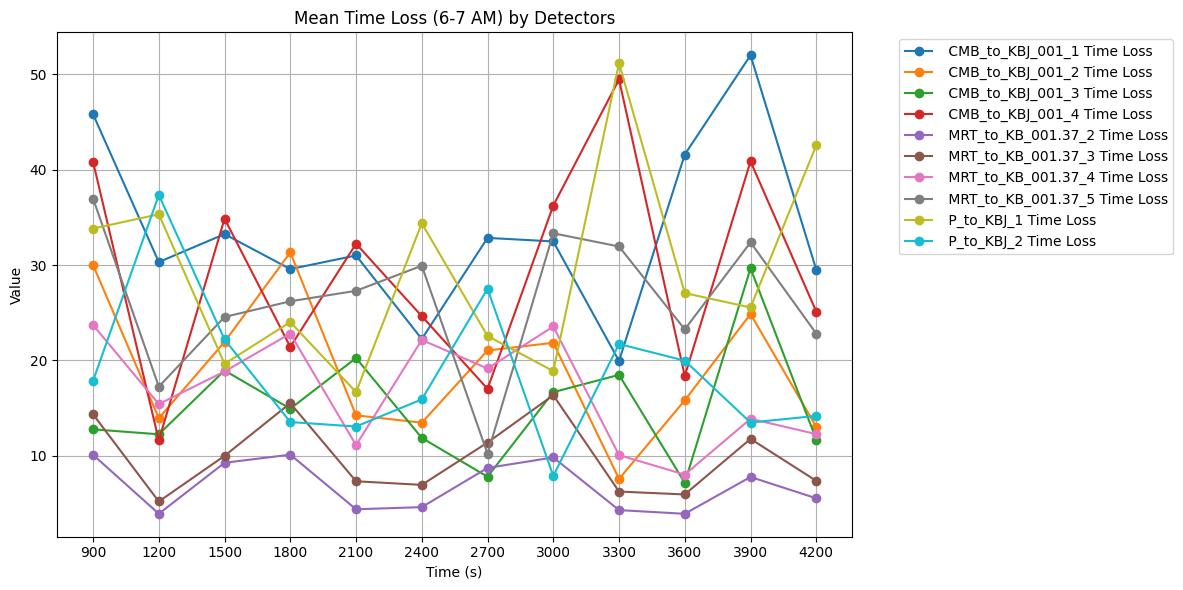

In [16]:
# Plot
plt.figure(figsize=(12, 6))
for detector in df_grouped[' interval_id'].unique():
    subset = df_grouped[df_grouped[' interval_id'] == detector]
    plt.plot(subset['interval_begin'], subset[' interval_meanTimeLoss'], marker='o', label=f"{detector} Time Loss")
    ##plt.plot(subset['interval_begin'], subset[' interval_meanOccupancy'], marker='s', label=f"{detector} Occupancy")

plt.xlabel("Time (s)")
plt.ylabel("Value")
plt.title("Mean Time Loss (6-7 AM) by Detectors")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(df_grouped['interval_begin'].unique())
plt.tight_layout()
plt.show()

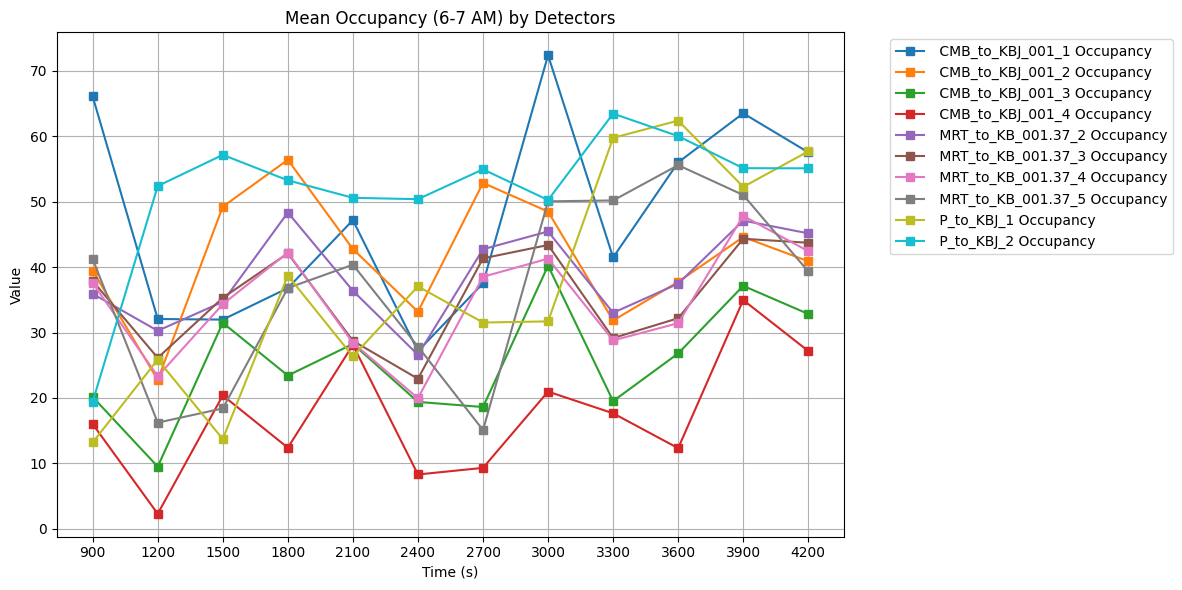

In [15]:
# Plot
plt.figure(figsize=(12, 6))
for detector in df_grouped[' interval_id'].unique():
    subset = df_grouped[df_grouped[' interval_id'] == detector]
    ##plt.plot(subset['interval_begin'], subset[' interval_meanTimeLoss'], marker='o', label=f"{detector} Time Loss")
    plt.plot(subset['interval_begin'], subset[' interval_meanOccupancy'], marker='s', label=f"{detector} Occupancy")

plt.xlabel("Time (s)")
plt.ylabel("Value")
plt.title("Mean Occupancy (6-7 AM) by Detectors")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(df_grouped['interval_begin'].unique())
plt.tight_layout()
plt.show()